**IMPORT LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**UTILITY FUNCTIONS**

In [2]:
def f(x, y):
    return (x+1.5-y)**2 + (2.5 + x - x*y**2)**2 + (2.625 - x + x*y**3)**2

def df(x,y):
  df_dx = 2*(x + 1.5 - y) +  2*(2.5 + x - x*y**2)*(1 - y**2) + 2*(2.625 - x + x*y**3)*(-1+y**3)
  df_dy = 2*(x + 1.5 - y)*(-1) + 2*(2.5 + x - x*y**2)*(-2*x*y) + 2*(2.625 - x + x*y**3)*(3*y**2*x)
  return [df_dx , df_dy]

def plot_contour(X, Y, f):
  ax = plt.figure(figsize=(6,6)).add_subplot(111)
  ax.set_aspect('equal')
  plt.contour(X, Y, f,levels = np.arange(0,50,1), colors=['bisque'])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.grid()
  return plt

def plot_line(line, col1, col2):
  x = np.zeros(len(line))
  y = np.zeros(len(line))
  for i in range(len(line)):
    x[i] = line[i][0]
    y[i] = line[i][1]
  plt.plot(x, y, col1, linewidth=2)
  plt.scatter(x[0], y[0], marker='o', s=100, c=col2, label = "Start")
  plt.scatter(x[-1], y[-1], marker='*', s=300, c=col2, label = "End")
  plt.legend(loc = 'best')

**ADAM**

Optimal Point: [-0.1510653394768955,2.123079487156143]
Optimal Value: 11.549332481785214
Steps taken: 1517


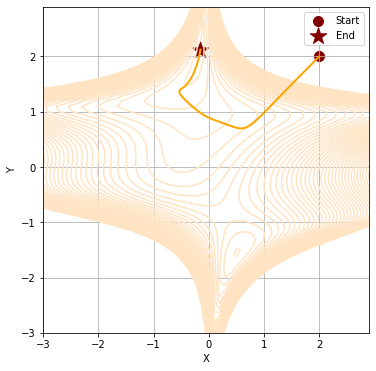

In [3]:
def adam(W, alpha, beta1, beta2, eps, error, max_steps = 10000):
  path = []
  path.append(W)
  steps = 0
  h = 0
  d = 0 
  while(steps<2 or np.sqrt(np.sum(np.power(path[-1]-path[-2],2)))> error):
    if(steps > max_steps):
      break
    steps = steps + 1
    gx = np.array(df(path[-1][0],path[-1][1]))   
    d = beta1*d + (1-beta1)*(gx)
    h = beta2*h + (1-beta2)*(np.power(gx,2))
    dc = np.divide(d,(1-np.power(beta1,steps)))
    hc = np.divide(h,(1-np.power(beta2,steps)))
    W = path[-1] - alpha*np.divide(dc,np.sqrt(hc)+eps)
    path.append(W)
  return path, steps

adam_path, steps = adam(np.array([2,2]), 0.1, 0.9, 0.999, 1e-8, 1e-6)
print("Optimal Point: [{},{}]".format(adam_path[-1][0], adam_path[-1][1]))
print("Optimal Value: {}".format(f(adam_path[-1][0], adam_path[-1][1])))
print("Steps taken: {}".format(steps))

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plot_contour(x,y,fxy)
plot_line(adam_path,'orange','maroon')

**RMS PROP**

Optimal Point: [-0.15055662477152248,2.122622843946209]
Optimal Value: 11.54936304841246
Steps taken: 10001


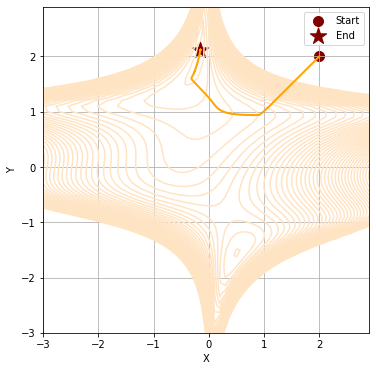

In [4]:
def rms(W, alpha, beta, eps, error, max_steps = 10000):
  path = []
  path.append(W)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(path[-1]-path[-2],2)))> error):
    if(steps>max_steps):
      break
    steps = steps + 1
    gx = np.array(df(path[-1][0],path[-1][1]))   
    h = beta*h + (1-beta)*(np.power(gx,2))
    hc = np.divide(h,(1-np.power(beta,steps)))
    W = path[-1] - alpha*np.divide(gx,np.sqrt(hc + eps))
    path.append(W)
  return path, steps

rms_path,steps = rms(np.array([2,2]), 0.001, 0.9, 1e-8, 1e-6)
print("Optimal Point: [{},{}]".format(rms_path[-1][0], rms_path[-1][1]))
print("Optimal Value: {}".format(f(rms_path[-1][0], rms_path[-1][1])))
print("Steps taken: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plot_contour(x,y,fxy)
plot_line(rms_path,'orange','maroon')

**SGD**

Optimal Point: [-0.1511337747967911,2.1227052677708924]:
Optimal Value: 11.549332703741728
Steps taken: 4450


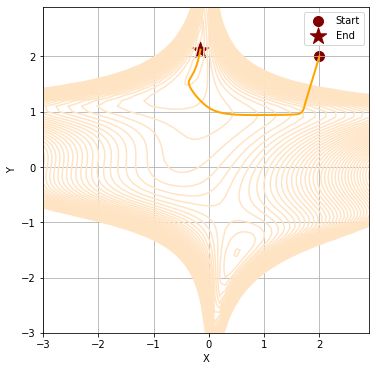

In [5]:
def sgd(W, alpha, error, max_steps = 10000):
  path = []
  path.append(W)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(path[-1]-path[-2],2)))> error):
    if(steps > max_steps):
        break
    steps = steps + 1
    gx = np.array(df(path[-1][0],path[-1][1]))
    W = path[-1] - alpha*gx
    path.append(W)
  return path, steps

sgd_path, steps = sgd(np.array([2,2]), 0.001, 1e-6)
print("Optimal Point: [{},{}]:".format(sgd_path[-1][0], sgd_path[-1][1]))
print("Optimal Value: {}".format(f(sgd_path[-1][0], sgd_path[-1][1])))
print("Steps taken: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plot_contour(x,y,fxy)
plot_line(sgd_path,'orange','maroon')

**MOMENTUM ACCELERATED GRADIENT DESCENT**

Optimal Pont: [-0.15113205909888183,2.1227146632694747]:
Optimal Value: 11.549332694318437
Steps taken: 4241


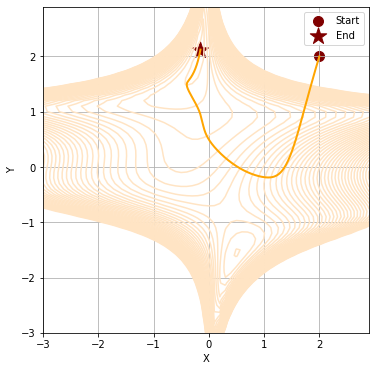

In [6]:
def momentum(W, alpha, beta, error, max_steps = 10000):
  path = []
  path.append(W)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(path[-1]-path[-2],2)))> error):
    if(steps > max_steps):
      break
    steps = steps + 1
    gx = np.array(df(path[-1][0],path[-1][1]))
    d = beta*d + (1-beta)*(-gx)
    W = path[-1] + alpha*d
    path.append(W)
  return path, steps

momentum_path, steps = momentum(np.array([2,2]), 0.001, 0.9, 1e-6)
print("Optimal Pont: [{},{}]:".format(momentum_path[-1][0], momentum_path[-1][1]))
print("Optimal Value: {}".format(f(momentum_path[-1][0], momentum_path[-1][1])))
print("Steps taken: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plot_contour(x,y,fxy)
plot_line(momentum_path,'orange','maroon')

**NESTEROV ACCELERATED GRADIENT DESCENT**

Optimal Point: [-0.15113233854852848,2.1227131329337765]
Optimal Value: 11.54933269583978
Steps taken: 4248


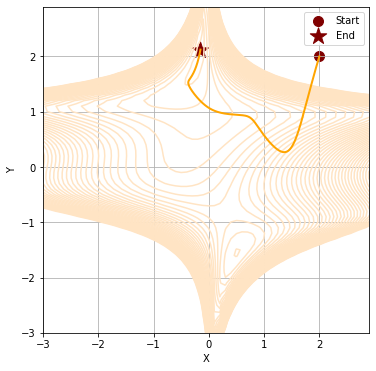

In [7]:
def nesterov(W, alpha, beta, error, max_steps = 10000):
  path = []
  path.append(W)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(path[-1]-path[-2],2)))> error):
    if(steps>max_steps):
      break
    steps = steps + 1
    Wadv = path[-1] - alpha*d
    grad_Wadv = np.array(df(Wadv[0],Wadv[1]))
    d = beta*d + (1-beta)*grad_Wadv
    W = path[-1] - alpha*d
    path.append(W)
  return path,steps

nesterov_path, steps = nesterov(np.array([2,2]), 0.001, 0.9, 1e-6)
print("Optimal Point: [{},{}]".format(nesterov_path[-1][0], nesterov_path[-1][1]))
print("Optimal Value: {}".format(f(nesterov_path[-1][0], nesterov_path[-1][1])))
print("Steps taken: {}".format(steps))

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = plot_contour(x,y,fxy)
plot_line(nesterov_path,'orange','maroon')

**COMPARISON**

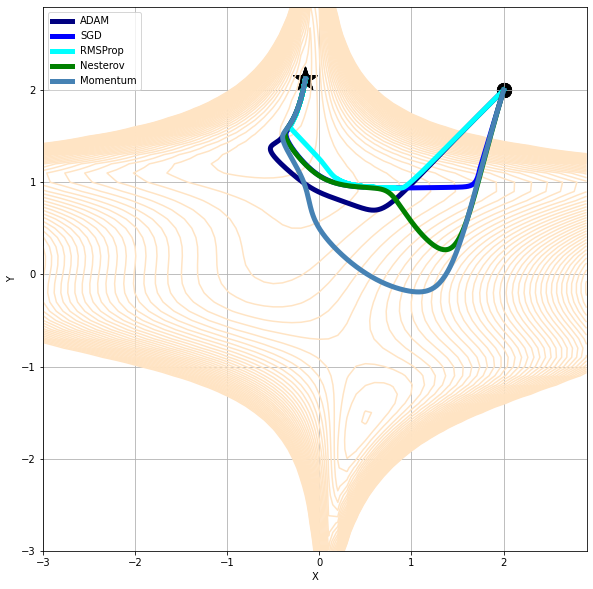

In [8]:
def plot_contour(X, Y, f):
  ax = plt.figure(figsize=(10,10)).add_subplot(111)
  ax.set_aspect('equal')
  plt.contour(X, Y, f,levels = np.arange(0,50,1), colors=['bisque'])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.grid()
  return plt

def plot_line(line, col1, col2):
  x = np.zeros(len(line))
  y = np.zeros(len(line))
  for i in range(len(line)):
    x[i] = line[i][0]
    y[i] = line[i][1]
  plt.plot(x, y, col1, linewidth=5)
  plt.scatter(x[0], y[0], marker='o', s=200, c=col2, label = "Start")
  plt.scatter(x[-1], y[-1], marker='*', s=600, c=col2, label = "End")
  plt.legend(loc = 'best')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = plot_contour(x,y,fxy)
plot_line(adam_path, 'navy', 'black')
plot_line(sgd_path, 'blue','black')
plot_line(rms_path, 'cyan','black')
plot_line(nesterov_path, 'green','black')
plot_line(momentum_path, 'steelblue','black')
plt.legend(['ADAM', 'SGD', 'RMSProp', 'Nesterov','Momentum'])
plt.show()

**Observations:**

All the optimiser approaches the minima with following number of iterations:

1.   ADAM: 1517
2.   Momentum: 4241
3.   Nesterov: 4248
4.   SGD: 4450
5.   RMSProp: 10001

ADAM converges the fastest as it uses both momentum and velocity in the gradient direction to reach minima. Although the learning rate for ADAM is higher than others which is a reson for it to converge faster, we can observe that even with high learning rate ADAM converges while others diverge, hence needing small learning rate which slows down convergence.

Momentum accelarated and Nesterov use only momentum, hence converge slower than ADAM. Although Nesterov is an improvement over simple Momentum accelerated gradient descent, they perform fairly similiar for high value of beta, as is the case here.

SGD does not take into account previous momentum, hence it takes even longer to approach minima.

RMSProp oscillates about the minima for high learning rate, so in order to make it approach the minima, lower learning rate is needed, which slows down the convergence by taking a large number of steps.